# Reporte técnico: Clasificación de imágenes

Integrantes:

- Miguel Angel Bula Carmona
- Dioselin Esteban Brito Peñaloza
- Marcos David Carrillo Builes
- Yeferson Steven Aguilar Alvarado

## Introducción

Este reporte técnico se centra en el desarrollo y validación de un modelo de aprendizaje estadístico destinado a la clasificación de imágenes faciales. Utilizamos el conjunto de datos "CMU Face Images Data Set", disponible en el UCI Machine Learning Repository, que contiene 640 imágenes de sujetos en diversas poses y con variaciones como el uso o no de gafas de sol.

En las siguientes secciones, se documenta el proceso de desarrollo del modelo, incluyendo la selección y preprocesamiento de los datos, la elección de la metodología estadística, el entrenamiento del modelo, y la evaluación de su rendimiento. Se proporcionan detalles técnicos y comentarios sobre las salidas generadas durante cada etapa, ofreciendo una comprensión clara y detallada del enfoque adoptado y los resultados obtenidos.


## Metodología

Para el desarrollo de este reto, se llevará acabo los siguientes pasos:

1. Preparación de los datos.

2. Umbralización.

3. Extracción de Características.

4. Entrenamiento del Modelo.

5. Evaluación del Modelo.

6. Predicciones.

7. Conclusiones.

## Preparación de los datos

En esta fase, se realizó la adquisición y limpieza de los datos del conjunto "CMU Face Images Data Set". Se detallan los procedimientos para la selección de imágenes relevantes, el manejo de datos faltantes o corruptos, y la normalización de las imágenes para garantizar la consistencia en el análisis.

In [1]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import warnings
import random
warnings.filterwarnings('ignore')

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

En la fase inicial del proyecto, se procesaron las imágenes del conjunto "CMU Face Images Data Set" para clasificarlas en dos categorías: sujetos con gafas de sol  y sujetos sin gafas de sol. Se crearon directorios específicos para almacenar las imágenes procesadas en cada categoría. Durante este proceso, se convirtieron las imágenes del formato original (PGM) a JPEG para facilitar su manipulación y análisis posteriores.

Resultados clave de esta fase:

- **Imágenes de Sujetos con Gafas de sol:** Se procesaron y almacenaron un total de 311 imágenes.
- **Imágenes de Sujetos sin Gafas de sol:** Se procesaron y almacenaron un total de 313 imágenes.

Estos resultados demuestran un balance en la cantidad de imágenes disponibles para cada categoría, lo que es beneficioso para el entrenamiento y evaluación del modelo de clasificación. A continuación en la **Figura 1** puede observar 5 imágenes de sujetos con gafas de sol, y en la **Figura 2** imágenes de sujetos sin gafas de sol

In [2]:
### Adquisición de datos
# folders = glob.glob('faces/*')

# try:
#     os.makedirs('./res/sunglass', exist_ok = True)
#     os.makedirs('./res/open', exist_ok = True)
# except:
#     print('Error creating directory')
# s = 0
# o = 0
# for folder in folders:
#     files = glob.glob(folder+'/*open.pgm') + glob.glob(folder+'/*sunglasses.pgm')
#     for file in files:
#         image = cv2.imread(file, -1)
#         if 'sunglass' in file:
#             cv2.imwrite('res/sunglass/'+file.split('/')[-1].split('.pgm')[0] + '.jpg', image)
#             s += 1
#         else:
#             cv2.imwrite('res/open/'+file.split('/')[-1].split('.pgm')[0] + '.jpg', image)
#             o += 1

# print('Sunglass images: ', s)
# print('Open images: ', o)
    

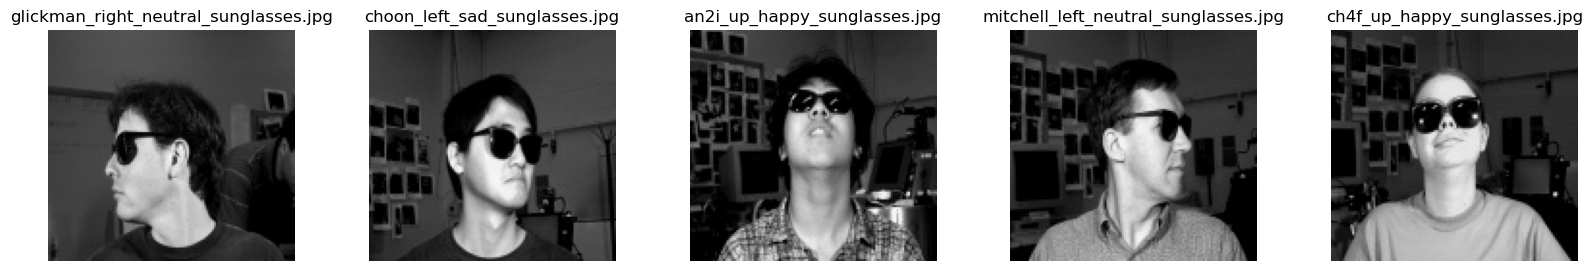

In [3]:
# Obtener una lista de nombres de archivo de cada categoría
files_sunglass = os.listdir('./res/sunglass')
files_open = os.listdir('./res/open')

# Seleccionar al azar 5 imágenes de cada categoría
random_sunglass_files = random.sample(files_sunglass, 5)
random_open_files = random.sample(files_open, 5)

# Función para mostrar imágenes
def show_images(files, category):
    plt.figure(figsize=(20, 3))
    for i, file in enumerate(files):
        img_path = os.path.join(category, file)
        img = cv2.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(file)
        plt.axis('off')
    plt.show()

# Mostrar imágenes de sujetos con gafas de sol
show_images(random_sunglass_files,'./res/sunglass')


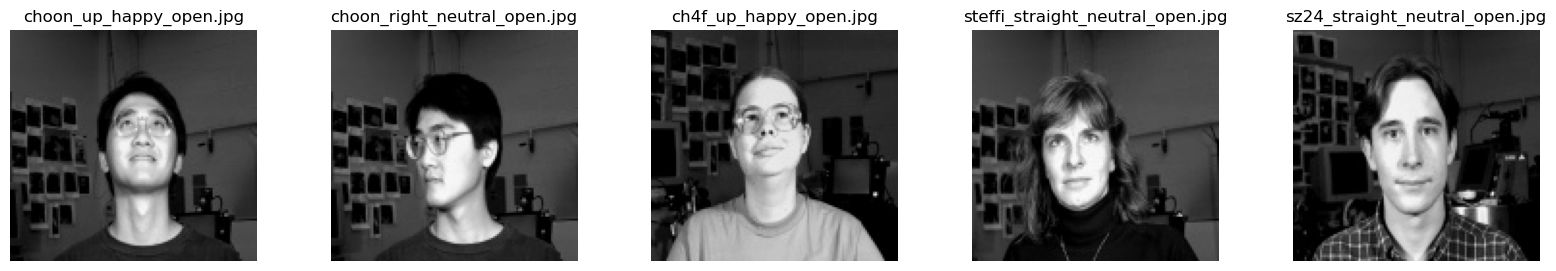

In [4]:
show_images(random_open_files, './res/open')

## Umbralización

En esta sección, se implementó una técnica de umbralización para resaltar características clave en las imágenes, como la presencia o ausencia de gafas. La umbralización es un proceso de segmentación de imágenes que convierte una imagen en escala de grises a una imagen binaria (Blanco y Negro), basada en un umbral definido. Este proceso es crucial para simplificar el análisis visual y mejorar la detección de características distintivas.

Para demostrar y ajustar interactivamente el efecto de la umbralización, se utilizó un control deslizante interactivo implementado con ipywidgets. Este control permite modificar el valor del umbral en tiempo real y observar cómo afecta la visualización de la imagen. 

El resultado de la umbralización varía significativamente con el valor del umbral: valores bajos pueden no distinguir adecuadamente entre las gafas y la cara, mientras que valores demasiado altos pueden perder detalles importantes. La elección del umbral correcto es fundamental para maximizar la eficacia de la detección de las gafas en las imágenes. En la **Figura 3** puede ver un ejemplo de una imagen binarizada con un valor de 40.

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, HTML

# Insertar CSS para centrar la salida del widget
display(HTML("""
<style>
    .widget-output {
        display: flex;
        justify-content: center;
        align-items: center;
    }
</style>
"""))

def threshold_image(threshold):
    image = cv2.imread('./res/sunglass/an2i_left_angry_sunglasses.jpg', 0)
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(thresholded_image, cmap='gray')
    plt.axis('off')  
    plt.show()      

interact(threshold_image, threshold=widgets.IntSlider(min=0, max=255, step=1, value=40))


interactive(children=(IntSlider(value=30, description='threshold', max=255), Output()), _dom_classes=('widget-…

<function __main__.threshold_image(threshold)>

De la **Figura 3** puede observar que al aplicar umbralización, se puede notar las caracteristicas de los sujetos con gafas de sol, lo que facilita la extracción de caracteristicas relevantes en etapas posteriores del proceso de clasificación. Por lo tanto, se emplea la aplicación de un umbral de 30 para todas las imagenes del conjunto de dato.

## Extracción de Características

En la etapa de extracción de características, se implementaron métodos avanzados de análisis de formas para identificar y cuantificar características distintivas en las imágenes. Estas características son cruciales para el proceso de clasificación posterior. A continuación, se detallan las características específicas extraídas:

1. **Momentos de Hu:**
    <br></br>
    - Proporcionan una representación numérica compacta e invariante de las imágenes, resistente a cambios en la escala, la rotación y la traslación. Estos momentos son transformados logarítmicamente para normalizar su escala. 
    <br></br>
2. **Orientación:**
    <br></br>
    - Mide el ángulo de inclinación de la forma principal de la imagen, proporcionando una indicación de la dirección predominante de los objetos.
    <br></br>
3.  **Relación Área/Área Convexa:**
    <br></br>
    - Compara el área del objeto con el área de su envolvente convexa, sirviendo como un indicador de regularidad en la forma del objeto.
    <br></br>
4.  **Compacidad:**
    <br></br>
    - Evalúa qué tan densamente está empaquetado el área dentro del perímetro del objeto, siendo una medida de la regularidad de la forma.
    <br></br>
5. **Redondez:**
    <br></br>
    - Una medida de cuán cercana es la forma del objeto a un círculo perfecto, calculada a partir del área y el perímetro.
    <br></br>
6. **Relación Área/Perímetro:**
    <br></br>
    - Relaciona el área del objeto con su perímetro, donde valores más altos indican una forma más compacta.
    <br></br>
7. **Elongación:**
    <br></br>
    - Determina la proporción entre los ejes mayor y menor de la forma, proporcionando una medida de cuán alargado está el objeto.
    <br></br>
8. **Solidity (1 y 2):**
    <br></br>
    - Estas dos medidas de solidez comparan el área del objeto con su área convexa y su área rellena respectivamente, indicando la plenitud de la forma.
    
El procesamiento se lleva a cabo mediante técnicas de morfología para eliminar objetos pequeños y segmentar adecuadamente la imagen, lo que permite una extracción precisa de las propiedades regionales de los objetos. 

En la **Tabla 1** puede observar algunas de las caracteristicas extraídas de las 5 primeras imagenes

In [467]:
from skimage import morphology
from skimage.measure import label, regionprops
import math
def get_moments_hu(props, features):
    moments_hu = props.moments_hu
    moments_hu = np.sign(moments_hu) * np.log(np.abs(moments_hu))
    features['hu0'] = moments_hu[0]
    features['hu1'] = moments_hu[1]
    features['hu2'] = moments_hu[2]
    features['hu3'] = moments_hu[3]
    features['hu4'] = moments_hu[4]
    features['hu5'] = moments_hu[5]
    features['hu6'] = moments_hu[6]
    return features

#función de características de forma

def get_features_area(props, features):
    features['orientation'] = props.orientation
    features['area_to_convex_ratio'] = props.area/props.convex_area
    features['compacity'] = props.perimeter**2/props.area
    features['roundness'] = 4*math.pi*props.area /(props.perimeter**2)
    features['area_perimeter_ratio'] = props.area / props.perimeter
    try:
        features['elongation'] = props.major_axis_length/props.minor_axis_length
    except:
        features['elongation'] = 0
    features['solidity1'] = props.area/props.convex_area
    features['solidity2'] = props.area / props.filled_area
    return features

#función que extrae características de una imagen

def get_features(img):
    features = {}
    # img *= morphology.remove_small_objects(img.astype(bool), min_size = 20)
    label_img = label(img)
    props = regionprops(label_img)[0]
    features = get_moments_hu(props, features)
    features = get_features_area(props, features)
    return features

In [468]:
features_0 = get_features(cv2.imread('res/open/an2i_left_angry_open.jpg', 0) > 40)
columns = list(features_0.keys())
columns.append('class')

df = pd.DataFrame(columns = columns)

# df

In [469]:
for file in glob.glob('res/open/*'):
    img = cv2.imread(file, 0)
    img = img > 40
    features = get_features(img)
    features['class'] = 'Sin gafas'
    df = df.append(features, ignore_index = True)

for file in glob.glob('res/sunglass/*'):
    img = cv2.imread(file, 0)
    img = img > 40
    features = get_features(img)
    features['class'] = 'Con gafas'
    df = df.append(features, ignore_index = True)
    

In [470]:
df = df.fillna(0)

df

,hu0,hu1,hu2,hu3,hu4,hu5,hu6,orientation,area_to_convex_ratio,compacity,roundness,area_perimeter_ratio,elongation,solidity1,solidity2,class
0,-1.487091,-6.271110,-5.989452,-10.167624,21.212363,-14.118782,-18.247490,-1.139243,0.676687,253.124894,0.049645,5.720745,1.215033,0.676687,0.895761,Sin gafas
1,-1.487107,-7.350595,-8.110798,-10.058409,-19.211288,-13.797233,20.172290,1.330588,0.728522,283.831569,0.044274,6.232169,1.119176,0.728522,0.841462,Sin gafas
2,-1.369918,-3.692035,-6.693318,-7.708048,-15.052562,-9.817492,-15.601905,1.426842,0.649701,51.484653,0.244080,4.106019,2.068781,0.649701,0.997701,Sin gafas
3,-1.390254,-4.329312,-6.932349,-8.505380,16.224907,-10.787771,19.537686,-1.534607,0.681818,33.199461,0.378511,1.503021,1.646339,0.681818,0.986842,Sin gafas
4,-1.401259,-10.393374,-6.590486,-8.611167,-16.617999,-16.073410,-16.505455,1.428062,0.674222,380.081797,0.033062,5.203689,1.022732,0.674222,0.934787,Sin gafas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,-0.440471,-1.106072,-3.404548,-4.006509,-7.722472,-4.623739,-9.651996,1.451906,0.559554,107.885800,0.116478,4.726355,4.217374,0.559554,0.941039,Con gafas
620,-0.784515,-2.106457,-5.880272,-5.571045,-11.300487,-6.640801,-13.740624,0.932070,0.487578,56.372693,0.222916,1.668843,2.736352,0.487578,0.969136,Con gafas
621,-1.289292,-3.128505,-7.142289,-10.070704,18.677233,11.635003,-23.507011,1.519899,0.743319,41.494248,0.302846,5.047119,2.705467,0.743319,1.000000,Con gafas
622,-1.344216,-6.359182,-5.964872,-8.047139,-15.262580,17.120763,-15.589307,-1.457290,0.620480,229.451485,0.054767,6.260121,1.174601,0.620480,0.956799,Con gafas


## Entrenamiento del Modelo

### Divisón y Preparación de Datos

Para evaluar el rendimiento del modelo, el conjunto de datos se dividió en dos partes: entrenamiento y prueba. Utilizamos el siguiente enfoque:

-**Conjunto de Entrenamiento (Train)**: Se seleccionó el 75% del conjunto de datos original al azar para el entrenamiento. Esta selección se realizó de manera que se mantenga la representatividad de las diferentes clases.

-**Conjunto de Prueba (Test):** El 25% restante del conjunto de datos se utilizó para evaluar el rendimiento del modelo. Este conjunto no participa en el entrenamiento y sirve para proporcionar una evaluación imparcial.

En la **Tabla 2** puede observar los valores del y_train.

In [471]:
df_train = df.sample(frac = 0.75, random_state = 0)
df_test = df.drop(df_train.index)

# df_train.to_csv('train.csv', index = False)
# df_test.to_csv('test.csv', index = False)

In [472]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# df_train

In [473]:
X_train = df_train.drop('class', axis = 1)
y_train = df_train['class']

X_test = df_test.drop('class', axis = 1)
y_test = df_test['class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

df_y = pd.DataFrame(y_train)

df_y


,class
0,Con gafas
1,Sin gafas
2,Con gafas
3,Con gafas
4,Con gafas
...,...
463,Sin gafas
464,Con gafas
465,Con gafas
466,Con gafas


Tras la división, se procedió a la preparación de los datos para el entrenamiento:

-**Escalar los Datos:** Utilizamos StandardScaler para normalizar las características, asegurando que tengan una media de 0 y una desviación estándar de 1. Este paso es crucial para evitar que las variables con mayor magnitud dominen el modelo y para acelerar la convergencia durante el entrenamiento.

-**Codificación de Etiquetas:** Las etiquetas de clase se transformaron utilizando LabelEncoder. Este proceso convierte las etiquetas de clase en valores numéricos, facilitando su manejo por los algoritmos de aprendizaje automático.

Con estos pasos, preparamos el conjunto de datos para garantizar que el modelo pueda aprender de manera efectiva y justa, maximizando su capacidad para generalizar a partir de los datos de entrenamiento y evaluarse correctamente en los datos de prueba.

En la **Tabla 3** puede observar la transformación del x_train.

In [474]:
df_x = pd.DataFrame(X_train, columns = columns[:-1])

df_x

,hu0,hu1,hu2,hu3,hu4,hu5,hu6,orientation,area_to_convex_ratio,compacity,roundness,area_perimeter_ratio,elongation,solidity1,solidity2
0,-0.403031,-0.395035,0.088449,0.029273,-0.543880,-0.862540,-0.863224,1.247504,0.256170,0.309560,-0.507652,0.172021,-0.530391,0.256170,0.006988
1,-0.306286,-1.880114,0.349149,0.046676,-0.520366,1.199633,1.213792,-0.082612,-0.075803,0.695912,-0.575977,-0.159595,-0.697061,-0.075803,-0.502690
2,0.223747,1.293673,0.396939,1.145638,-0.329678,-0.572093,1.016601,1.428581,-0.012811,-1.345411,2.116193,-0.603144,1.337486,-0.012811,1.543420
3,-0.506807,-0.374969,-0.955741,-0.498907,-0.687617,1.125028,1.216142,-0.190154,0.458889,0.732197,-0.581232,-0.078017,-0.520660,0.458889,0.339554
4,-0.214952,-0.056900,-0.871983,-0.373794,1.775155,-0.971644,-0.923310,-1.216966,0.190124,0.685764,-0.574478,-0.089132,-0.441667,0.190124,-0.234300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,-0.387217,-0.400636,-0.331334,-0.139789,-0.588210,1.098236,-0.959559,-0.131612,-0.055463,0.396512,-0.525333,0.089314,-0.532435,-0.055463,0.421946
464,0.331706,1.406467,-0.248551,-0.633563,1.720880,1.006083,1.175691,1.494150,1.465250,-1.364542,2.360624,-0.130685,1.965864,1.465250,1.548124
465,0.066671,-1.051123,-0.221534,0.269535,1.682532,-0.889598,-0.794972,0.267679,-1.123760,0.441863,-0.533958,-0.310330,-0.647441,-1.123760,-0.483188
466,-0.536516,-0.270517,-0.110633,-0.139807,-0.639494,-0.885436,-0.855956,1.200307,0.537414,0.300177,-0.505648,0.247875,-0.490889,0.537414,0.187108


Finalmente, en la **Tabla 4** puede observar el y_train con las etiquetas codificadas. Donde:

-**Clase 0:** Sujeto con gafas de sol.

-**Clas 1:** Sujeto sin gafas de sol.

In [475]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_train

y_test = encoder.transform(y_test)

df_y = pd.DataFrame(y_train, columns = ['class'])

df_y

,class
0,0
1,1
2,0
3,0
4,0
...,...
463,1
464,0
465,0
466,0


### Ajuste del modelo

Se empleó el clasificador **MLPClassifier (Multi-Layer Perceptron)** de scikit-learn para el ajuste del modelo. Los hiperparámetros clave incluyeron un número máximo de iteraciones fijado en 150 para evitar un posible sobre ajuste del modelo, y un random_state de 2023 para garantizar la reproducibilidad de los resultados. En la **Tabla 5** puede observar las métricas de los resultados de las predicciones en el X_test (Conjunto de datos que no fue entrenado el modelo)

In [488]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter = 150, random_state=2023)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred, target_names = ['Sin gafas', 'Con gafas'])

print(report)

              precision    recall  f1-score   support

   Sin gafas       0.70      0.81      0.75        72
   Con gafas       0.81      0.70      0.75        84

    accuracy                           0.75       156
   macro avg       0.75      0.75      0.75       156
weighted avg       0.76      0.75      0.75       156



El rendimiento del modelo clasificador se evaluó utilizando varias métricas estadísticas clave. Cada una de estas métricas ofrece una perspectiva única sobre la eficacia del modelo. A continuación, se explican estas métricas con base en los resultados obtenidos:

- **Precisión (Precisión):** Mide la exactitud de las predicciones positivas. Por ejemplo, una precisión del 70% para la clase "Sin gafas" indica que el 70% de las imágenes clasificadas como "Sin gafas" eran correctas.

- **Recall (Sensibilidad):** Refleja la capacidad del modelo para encontrar todas las instancias relevantes de una clase. Un recall del 81% para "Sin gafas" significa que el modelo identificó correctamente el 81% de todas las imágenes reales de esa clase.

- **Exactitud (Accuracy):** Es la medida más intuitiva y representa la proporción de predicciones correctas entre el total de casos. Una exactitud del 75% muestra que, en general, el modelo clasificó correctamente el 75% de las imágenes del conjuto de prueba.


## Evaluación del modelo

Tras entrenar el modelo utilizando MLPClassifier, se realizó una evaluación del rendimiento utilizando el mismo conjunto de entrenamiento para entender cómo el modelo se ajusta a los datos con los que fue entrenado. Esto es importante para detectar signos de sobreajuste o subajuste. En la **Tabla 6** puede observar las métricas de los resultados de las predicciones en el X_train (Conjunto de datos con el que fue entrenado el modelo)

In [490]:
### score in train set

y_train_pred  = model.predict(X_train)

print(classification_report(y_train, y_train_pred, target_names = ['Sin gafas', 'Con gafas']))

              precision    recall  f1-score   support

   Sin gafas       0.76      0.79      0.78       239
   Con gafas       0.77      0.75      0.76       229

    accuracy                           0.77       468
   macro avg       0.77      0.77      0.77       468
weighted avg       0.77      0.77      0.77       468



La exactitud total del modelo fue del 77%, lo cual es un indicador positivo de su capacidad para clasificar correctamente las imágenes en ambas categorías. Sin embargo, es crucial comparar estos resultados con los obtenidos en el conjunto de prueba para evaluar la capacidad de generalización del modelo.

Para evaluar la presencia de sobreajuste en el modelo, comparamos el error cuadrático medio (MSE) entre los conjuntos de entrenamiento y prueba. El MSE mide la diferencia promedio al cuadrado entre los valores predichos y los valores reales, siendo un indicador común del error del modelo.

Los resultados obtenidos fueron los siguientes:

In [493]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Calcular el porcentaje de cambio
porcentaje_cambio = ((mse_test - mse_train) / mse_train) * 100

print("MSE en el conjunto de entrenamiento: ", round(mse_train, 2))
print("MSE en el conjunto de prueba: ", round(mse_test, 2))
print("Porcentaje de cambio del MSE: ", round(porcentaje_cambio, 2), "%")

MSE en el conjunto de entrenamiento:  0.23
MSE en el conjunto de prueba:  0.25
Porcentaje de cambio del MSE:  7.34 %


Un porcentaje de cambio pequeño sugiere que el modelo tiene un rendimiento similar en ambos conjuntos, lo cual es un indicador positivo de que no hay un sobreajuste significativo.

### Análisis de la Curva ROC

La Curva de Característica Operativa del Receptor (ROC) es una herramienta gráfica utilizada para evaluar la capacidad de diagnóstico de un clasificador binario. Representa la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) a diferentes umbrales de clasificación.

Por otro lado, el Área Bajo la Curva (AUC) es una medida del rendimiento del modelo. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un rendimiento no mejor que el azar. En este caso, el AUC score obtenido fue de 0.82, como puede observar en la **Figura 4**.

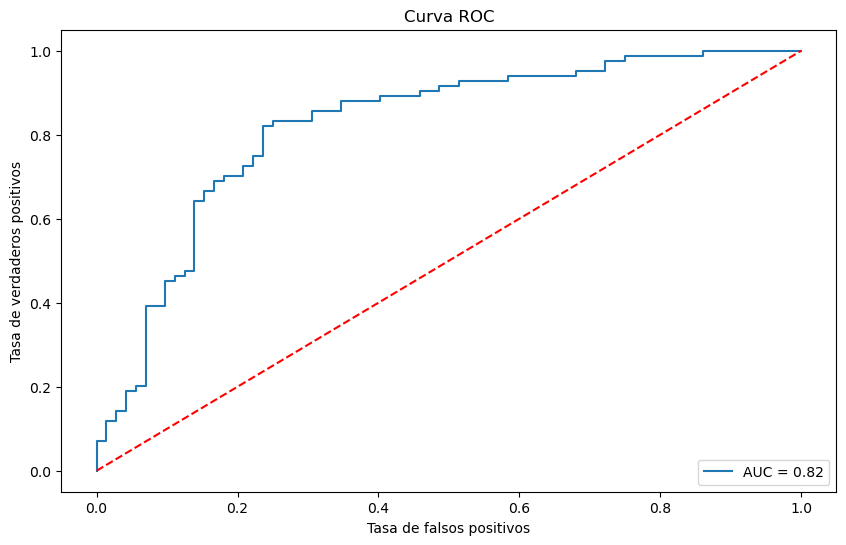

In [495]:
### roc curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label = 1)

auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc = 'lower right')
plt.show()


## Conclusiones

- El modelo de clasificación desarrollado demostró una capacidad significativa para distinguir entre sujetos con y sin gafas, alcanzando una exactitud del 75% y un AUC score de 0.82.

- Se logró un balance entre precisión, recall y F1-score en ambas clases, indicando un desempeño equilibrado del modelo.

- El análisis de sobreajuste mostró un cambio razonable en el MSE entre los conjuntos de entrenamiento y prueba, sugiriendo que el modelo generaliza bien a nuevos datos.

- Aunque el modelo es efectivo con buenos resultados, el uso de umbralización en el procesamiento de imágenes hace que el modelo es altamente sensible a las variaciones en las características clave, como la presencia de gafas. Aunque esto contribuyó a una discriminación efectiva entre las categorías, también implica una sensibilidad que podría ser afectada por variaciones en la iluminación o calidad de las imágenes. Esta característica es importante al considerar el contexto de aplicación y las condiciones de las imágenes.

## Anexos

- **Repositorio:** https://github.com/britop12/FA_Trabajo3

- **Reporte Técnico:** 

## Referencias

- https://scikit-learn.org/stable/user_guide.html

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc